# Regressão linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [2]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

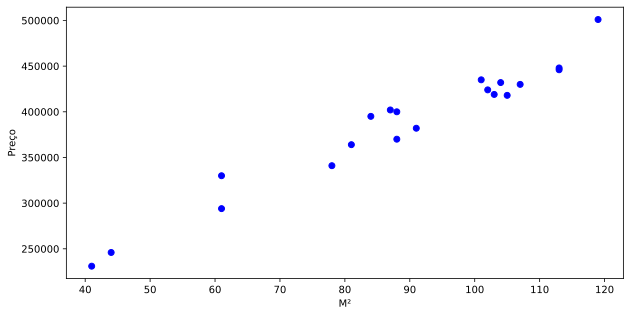

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [4]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [5]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1., 113.],
       [  1., 113.],
       [  1., 102.],
       [  1., 107.],
       [  1.,  91.],
       [  1.,  41.],
       [  1.,  61.],
       [  1., 104.],
       [  1., 119.],
       [  1., 101.],
       [  1., 105.],
       [  1.,  87.],
       [  1.,  84.],
       [  1.,  44.],
       [  1.,  88.],
       [  1.,  88.],
       [  1.,  61.],
       [  1.,  81.],
       [  1.,  78.],
       [  1., 103.]])

In [6]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.77100e+03],
       [1.77100e+03, 1.66301e+05]])

In [7]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[120256.79004531],
       [  2994.27679226]])

## Ajustando a reta

In [8]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]

In [9]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [10]:
ỹ

array([[458610.06757078],
       [458610.06757078],
       [425673.02285591],
       [440644.40681721],
       [392735.97814104],
       [243022.138528  ],
       [302907.67437322],
       [431661.57644043],
       [476575.72832434],
       [422678.74606365],
       [434655.85323269],
       [380758.870972  ],
       [371776.04059521],
       [252004.96890478],
       [383753.14776426],
       [383753.14776426],
       [302907.67437322],
       [362793.21021843],
       [353810.37984165],
       [428667.29964817]])

## Plotando os Dados

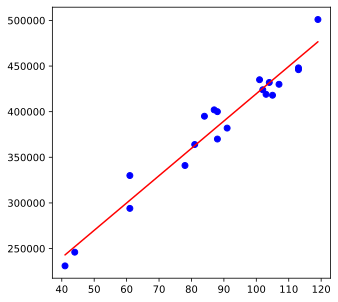

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

##  Scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

c:\Users\surze\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


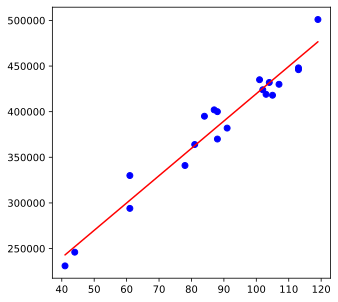

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X, y)

LinearRegression()

In [16]:
ỹ = lr.predict(X)

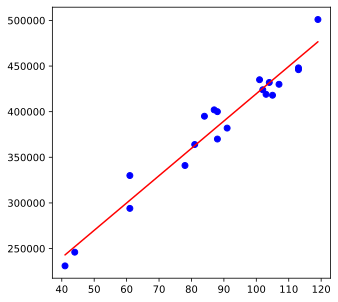

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [18]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.95


## Avaliando meu modelo de regressão

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 12609.50052484716
MSE: 211271975.79900712
RMSE: 14535.197824557019
